In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Path to log directory
log_dir = './log'

In [2]:
def parse_log_file(filepath):
    """Parse a log file and extract metrics."""
    with open(filepath, 'r') as f:
        content = f.read()
    
    # Extract metrics using regex
    time_match = re.search(r'Time taken:\s*([\d.]+)s', content)
    requests_match = re.search(r'Requests:\s*(\d+)', content)
    tokens_match = re.search(r'Tokens:\s*(\d+)', content)
    tps_match = re.search(r'TPS:\s*([\d.]+)', content)
    rps_match = re.search(r'RPS:\s*([\d.]+)', content)
    
    return {
        'time_taken': float(time_match.group(1)) if time_match else None,
        'requests': int(requests_match.group(1)) if requests_match else None,
        'tokens': int(tokens_match.group(1)) if tokens_match else None,
        'tps': float(tps_match.group(1)) if tps_match else None,
        'rps': float(rps_match.group(1)) if rps_match else None
    }

def get_concurrency_from_filename(filename):
    """Extract concurrency level from filename."""
    if 'single' in filename:
        return 1
    match = re.search(r'concurrent_(\d+)', filename)
    return int(match.group(1)) if match else None

In [3]:
# Read all log files and extract data
data = []

for filename in os.listdir(log_dir):
    if filename.endswith('.log'):
        filepath = os.path.join(log_dir, filename)
        metrics = parse_log_file(filepath)
        concurrency = get_concurrency_from_filename(filename)
        
        if concurrency is not None:
            data.append({
                'concurrency': concurrency,
                'filename': filename,
                **metrics
            })

# Create DataFrame and sort by concurrency
df = pd.DataFrame(data)
df = df.sort_values('concurrency').reset_index(drop=True)
print(df)

   concurrency                filename  time_taken  requests  tokens    tps  \
0            1         test_single.log        13.4         1     605  44.98   
1            2   test_concurrent_2.log        21.9         2    1379  62.84   
2            4   test_concurrent_4.log        34.0         4    2710  79.64   
3            8   test_concurrent_8.log        60.3         8    5158  85.47   
4           16  test_concurrent_16.log       135.5        16   10653  78.61   
5           32  test_concurrent_32.log       266.1        32   21533  80.92   
6           64  test_concurrent_64.log       490.8        64   42784  87.18   

    rps  
0  0.07  
1  0.09  
2  0.12  
3  0.13  
4  0.12  
5  0.12  
6  0.13  


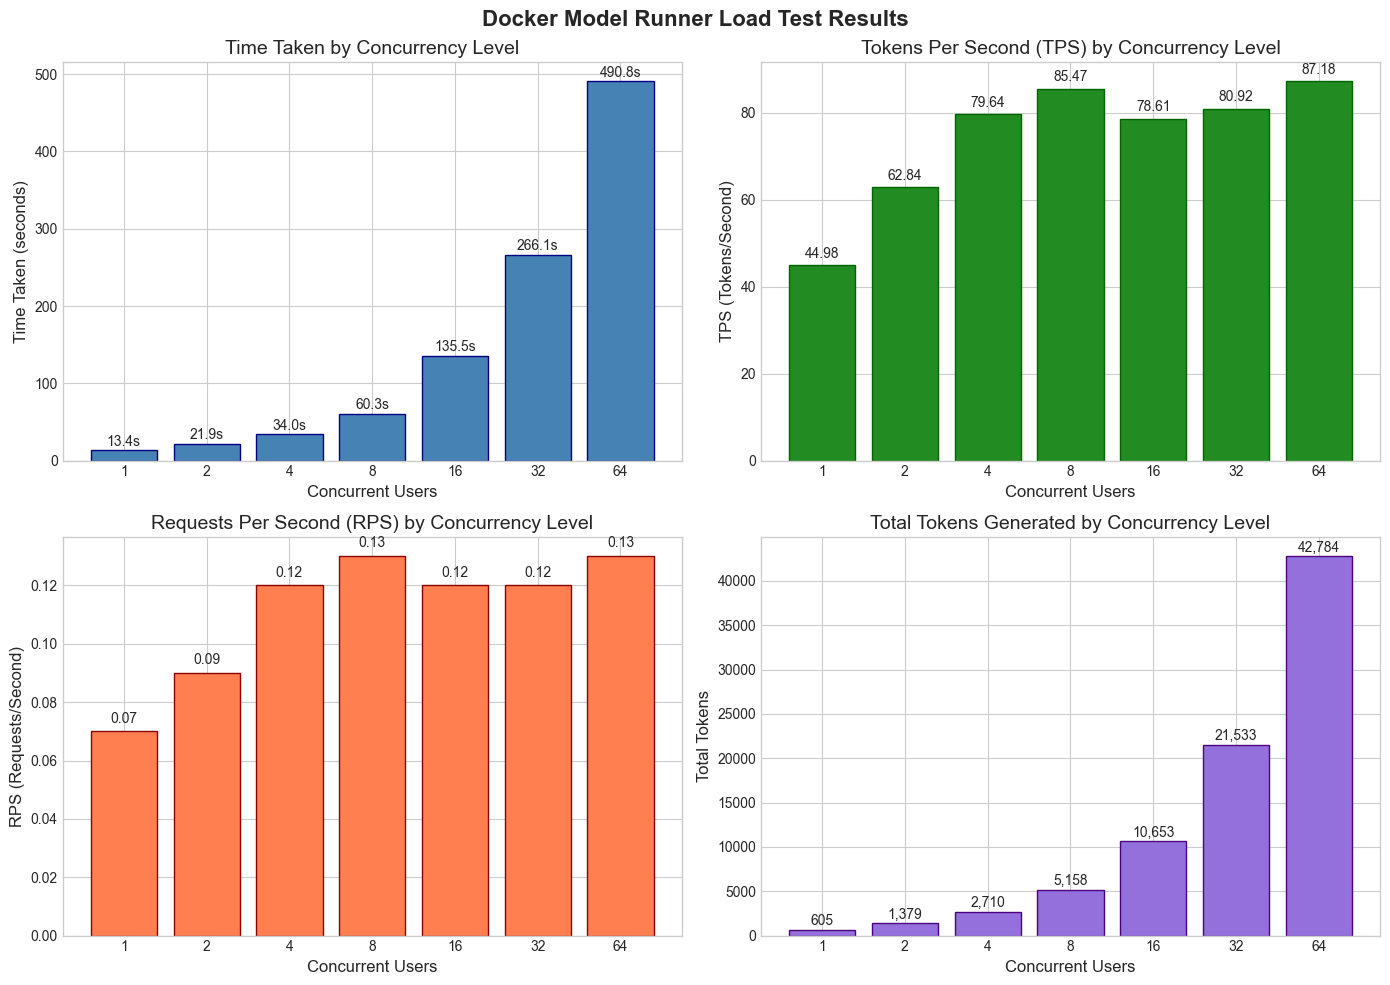

In [4]:
# Set up the plot style
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Docker Model Runner Load Test Results', fontsize=16, fontweight='bold')

# Plot 1: Time Taken
ax1 = axes[0, 0]
ax1.bar(df['concurrency'].astype(str), df['time_taken'], color='steelblue', edgecolor='navy')
ax1.set_xlabel('Concurrent Users', fontsize=12)
ax1.set_ylabel('Time Taken (seconds)', fontsize=12)
ax1.set_title('Time Taken by Concurrency Level', fontsize=14)
for i, v in enumerate(df['time_taken']):
    ax1.text(i, v + 2, f'{v:.1f}s', ha='center', va='bottom', fontsize=10)

# Plot 2: TPS (Tokens Per Second)
ax2 = axes[0, 1]
ax2.bar(df['concurrency'].astype(str), df['tps'], color='forestgreen', edgecolor='darkgreen')
ax2.set_xlabel('Concurrent Users', fontsize=12)
ax2.set_ylabel('TPS (Tokens/Second)', fontsize=12)
ax2.set_title('Tokens Per Second (TPS) by Concurrency Level', fontsize=14)
for i, v in enumerate(df['tps']):
    ax2.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Plot 3: RPS (Requests Per Second)
ax3 = axes[1, 0]
ax3.bar(df['concurrency'].astype(str), df['rps'], color='coral', edgecolor='darkred')
ax3.set_xlabel('Concurrent Users', fontsize=12)
ax3.set_ylabel('RPS (Requests/Second)', fontsize=12)
ax3.set_title('Requests Per Second (RPS) by Concurrency Level', fontsize=14)
for i, v in enumerate(df['rps']):
    ax3.text(i, v + 0.002, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Plot 4: Total Tokens
ax4 = axes[1, 1]
ax4.bar(df['concurrency'].astype(str), df['tokens'], color='mediumpurple', edgecolor='indigo')
ax4.set_xlabel('Concurrent Users', fontsize=12)
ax4.set_ylabel('Total Tokens', fontsize=12)
ax4.set_title('Total Tokens Generated by Concurrency Level', fontsize=14)
for i, v in enumerate(df['tokens']):
    ax4.text(i, v + 200, f'{v:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('load_test_results.png', dpi=150, bbox_inches='tight')
plt.show()

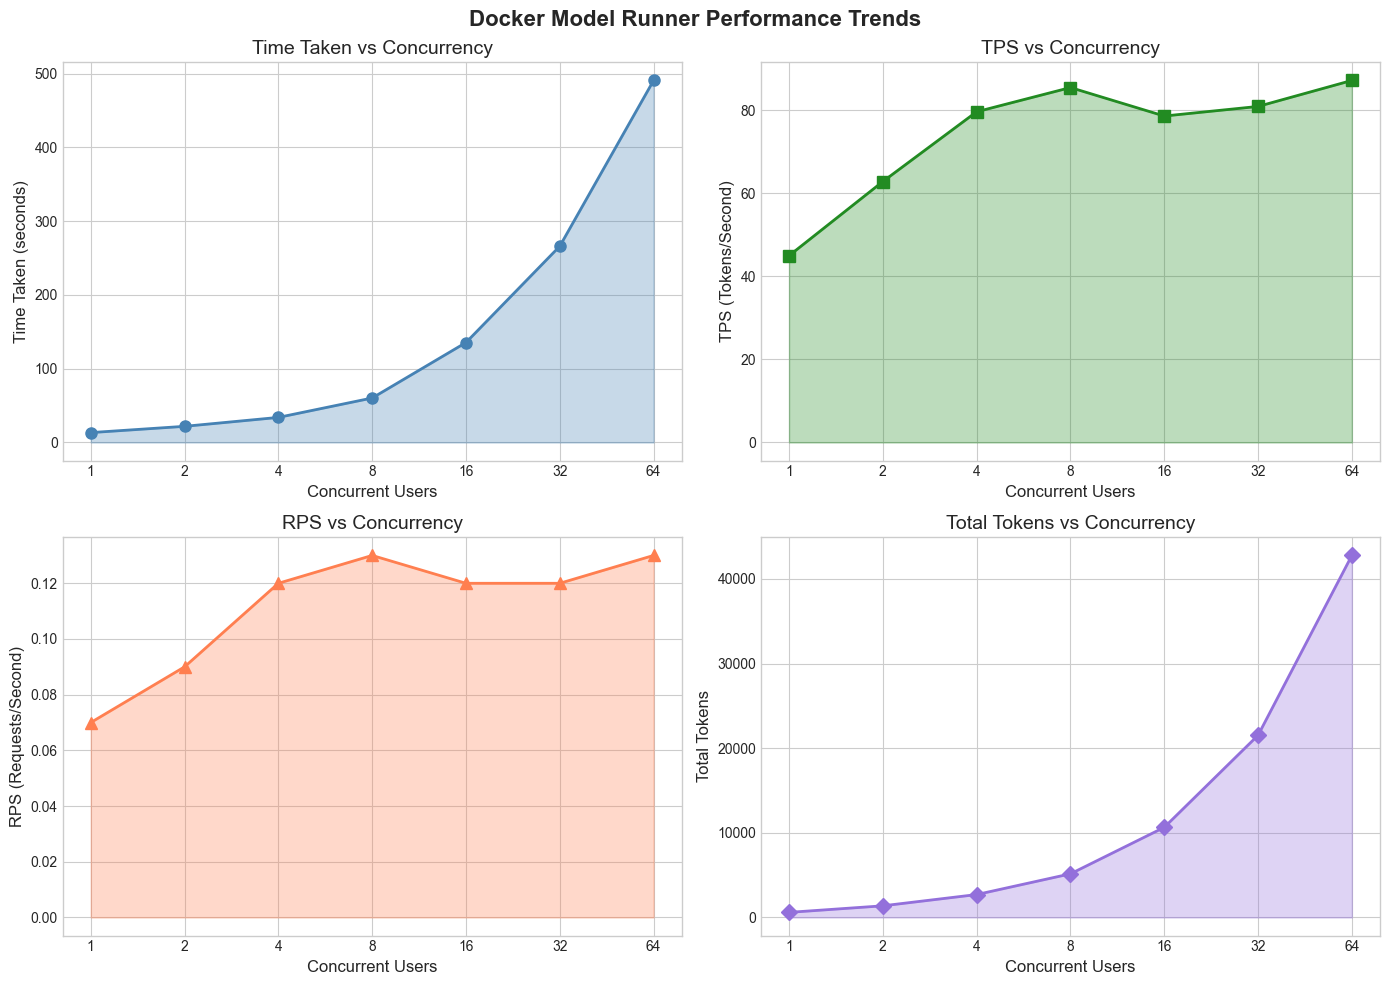

In [5]:
# Create line plots for trend analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Docker Model Runner Performance Trends', fontsize=16, fontweight='bold')

# Plot 1: Time Taken Trend
ax1 = axes[0, 0]
ax1.plot(df['concurrency'], df['time_taken'], marker='o', linewidth=2, markersize=8, color='steelblue')
ax1.fill_between(df['concurrency'], df['time_taken'], alpha=0.3, color='steelblue')
ax1.set_xlabel('Concurrent Users', fontsize=12)
ax1.set_ylabel('Time Taken (seconds)', fontsize=12)
ax1.set_title('Time Taken vs Concurrency', fontsize=14)
ax1.set_xscale('log', base=2)
ax1.set_xticks(df['concurrency'])
ax1.set_xticklabels(df['concurrency'])

# Plot 2: TPS Trend
ax2 = axes[0, 1]
ax2.plot(df['concurrency'], df['tps'], marker='s', linewidth=2, markersize=8, color='forestgreen')
ax2.fill_between(df['concurrency'], df['tps'], alpha=0.3, color='forestgreen')
ax2.set_xlabel('Concurrent Users', fontsize=12)
ax2.set_ylabel('TPS (Tokens/Second)', fontsize=12)
ax2.set_title('TPS vs Concurrency', fontsize=14)
ax2.set_xscale('log', base=2)
ax2.set_xticks(df['concurrency'])
ax2.set_xticklabels(df['concurrency'])

# Plot 3: RPS Trend
ax3 = axes[1, 0]
ax3.plot(df['concurrency'], df['rps'], marker='^', linewidth=2, markersize=8, color='coral')
ax3.fill_between(df['concurrency'], df['rps'], alpha=0.3, color='coral')
ax3.set_xlabel('Concurrent Users', fontsize=12)
ax3.set_ylabel('RPS (Requests/Second)', fontsize=12)
ax3.set_title('RPS vs Concurrency', fontsize=14)
ax3.set_xscale('log', base=2)
ax3.set_xticks(df['concurrency'])
ax3.set_xticklabels(df['concurrency'])

# Plot 4: Tokens Trend
ax4 = axes[1, 1]
ax4.plot(df['concurrency'], df['tokens'], marker='D', linewidth=2, markersize=8, color='mediumpurple')
ax4.fill_between(df['concurrency'], df['tokens'], alpha=0.3, color='mediumpurple')
ax4.set_xlabel('Concurrent Users', fontsize=12)
ax4.set_ylabel('Total Tokens', fontsize=12)
ax4.set_title('Total Tokens vs Concurrency', fontsize=14)
ax4.set_xscale('log', base=2)
ax4.set_xticks(df['concurrency'])
ax4.set_xticklabels(df['concurrency'])

plt.tight_layout()
plt.savefig('load_test_trends.png', dpi=150, bbox_inches='tight')
plt.show()

In [6]:
# Summary statistics
print("=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print(f"\nConcurrency levels tested: {sorted(df['concurrency'].tolist())}")
print(f"\nTime Taken:")
print(f"  Min: {df['time_taken'].min():.2f}s (at {df.loc[df['time_taken'].idxmin(), 'concurrency']} concurrent users)")
print(f"  Max: {df['time_taken'].max():.2f}s (at {df.loc[df['time_taken'].idxmax(), 'concurrency']} concurrent users)")
print(f"\nTPS (Tokens Per Second):")
print(f"  Min: {df['tps'].min():.2f} (at {df.loc[df['tps'].idxmin(), 'concurrency']} concurrent users)")
print(f"  Max: {df['tps'].max():.2f} (at {df.loc[df['tps'].idxmax(), 'concurrency']} concurrent users)")
print(f"\nRPS (Requests Per Second):")
print(f"  Min: {df['rps'].min():.2f} (at {df.loc[df['rps'].idxmin(), 'concurrency']} concurrent users)")
print(f"  Max: {df['rps'].max():.2f} (at {df.loc[df['rps'].idxmax(), 'concurrency']} concurrent users)")
print(f"\nTotal Tokens:")
print(f"  Min: {df['tokens'].min():,} (at {df.loc[df['tokens'].idxmin(), 'concurrency']} concurrent users)")
print(f"  Max: {df['tokens'].max():,} (at {df.loc[df['tokens'].idxmax(), 'concurrency']} concurrent users)")

SUMMARY STATISTICS

Concurrency levels tested: [1, 2, 4, 8, 16, 32, 64]

Time Taken:
  Min: 13.40s (at 1 concurrent users)
  Max: 490.80s (at 64 concurrent users)

TPS (Tokens Per Second):
  Min: 44.98 (at 1 concurrent users)
  Max: 87.18 (at 64 concurrent users)

RPS (Requests Per Second):
  Min: 0.07 (at 1 concurrent users)
  Max: 0.13 (at 8 concurrent users)

Total Tokens:
  Min: 605 (at 1 concurrent users)
  Max: 42,784 (at 64 concurrent users)
